# Package Usage
This notebook shows how to work with the functions that the `nngraphons` package provides.

## Initial Imports

In [1]:
import os
import sys

# Clones nngraphons package from GitHub in case of working from Google Colaboratory or Kaggle Kernels
CLOUD_HOSTED_ENVIRONMENT = True
if CLOUD_HOSTED_ENVIRONMENT:
    !rm -rf nngraphons
    !git clone https://github.com/honzahoang/nngraphons
    sys.path.append('./nngraphons')
else:
    sys.path.append('../nngraphons')

# Choose whether to utilize the GPU or not
# To switch to a virtual machine with GPU acceleration in Google Colab go to Runtime -> Change runtime type
os.environ['COMPUTATION_DEVICE'] = 'cpu'
# os.environ['COMPUTATION_DEVICE'] = 'cuda:0'

Cloning into 'nngraphons'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 296 (delta 146), reused 222 (delta 75), pack-reused 0
Receiving objects: 100% (296/296), 201.35 KiB | 932.00 KiB/s, done.
Resolving deltas: 100% (146/146), done.


## Graph Format
The simple graph format, that this package works with, is a tuple `(V, E)`, where `V` is a one dimensional numpy array of integers starting from 0 to the number of vertices and `E` is a two dimensional array of integers, where each rows represents an edge.

In [2]:
import numpy as np

Example numpy graph format for a $C_4$ cycle:

In [3]:
V = np.arange(4)
V

array([0, 1, 2, 3])

In [4]:
E = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 0]
])
E

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 0]])

In [5]:
C_4 = (V, E)
C_4

(array([0, 1, 2, 3]), array([[0, 1],
        [1, 2],
        [2, 3],
        [3, 0]]))

### Conversion to NetworkX Format and Back

We can also convert the numpy graph format to NetworkX's data strucutre for graphs in order to utilize that libraries graph algorithms.

In [6]:
from nngraphons.data_manipulation.networkx_conversion import np_to_nx, nx_to_np

In [7]:
np_to_nx(C_4)

In [8]:
nx_to_np(np_to_nx(C_4))

(array([0, 1, 2, 3]), array([[0, 1],
        [0, 3],
        [1, 2],
        [2, 3]]))

## Synthetic Graphons

Synthetic graphons are defined as Python functions.

### Visualization

The synthetic graphons can also be visualized:

In [9]:
from nngraphons.data_manipulation.synthetic_graphons import graphon_complete_bipartite, graphon_grow_unit_attach, graphon_constant
from nngraphons.visualization.graphon_visualization import visualize_synthetic_graphon
%matplotlib inline

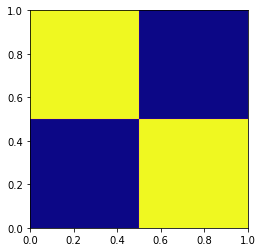

In [10]:
visualize_synthetic_graphon(graphon_complete_bipartite);

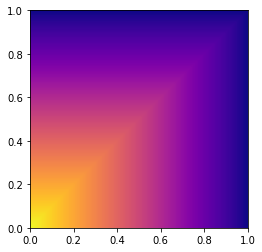

In [11]:
visualize_synthetic_graphon(graphon_grow_unit_attach);

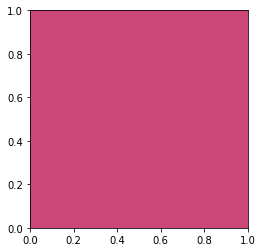

In [12]:
visualize_synthetic_graphon(graphon_constant);

### Sampling Random Graphs

We can sample random graphs from the graphons(for neural network training purposes for example):

In [13]:
import networkx as nx
from nngraphons.data_manipulation.graphon_sampling import sample_synthetic_graphon

In [14]:
G_sample = sample_synthetic_graphon(graphon_grow_unit_attach, size=10)
G_sample

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([[0, 0],
        [1, 1],
        [2, 1],
        [2, 2],
        [3, 1],
        [3, 2],
        [3, 3],
        [4, 1],
        [4, 2],
        [4, 3],
        [5, 0],
        [5, 3],
        [6, 0],
        [6, 2],
        [6, 3],
        [6, 4],
        [6, 6],
        [7, 6],
        [9, 3],
        [9, 4]]))

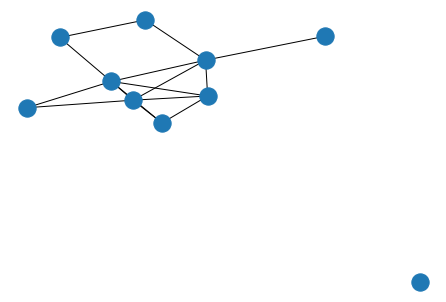

In [15]:
nx.drawing.nx_pylab.draw(np_to_nx(G_sample))

## Neural Network Graphons
Working with neural network is anologous to working with synthetic graphons:

In [16]:
from nngraphons.architectures.mlp import MLP
from nngraphons.data_manipulation.graphon_sampling import sample_neural_network_graphon
from nngraphons.visualization.graphon_visualization import visualize_neural_network_graphon

In [17]:
net = MLP(num_hidden_layers=2, hidden_size=4, init_gain=1.5)

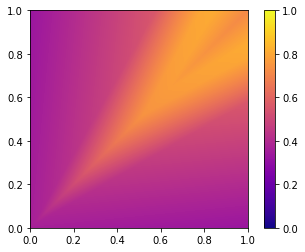

In [18]:
visualize_neural_network_graphon(net);

In [19]:
G_sample = sample_neural_network_graphon(net, size=10)
G_sample

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([[1, 1],
        [2, 0],
        [2, 1],
        [2, 2],
        [3, 0],
        [3, 1],
        [3, 3],
        [4, 1],
        [4, 3],
        [5, 0],
        [5, 1],
        [5, 2],
        [5, 3],
        [5, 4],
        [5, 5],
        [6, 1],
        [6, 2],
        [6, 3],
        [6, 4],
        [6, 5],
        [6, 6],
        [7, 0],
        [7, 2],
        [7, 3],
        [7, 4],
        [7, 5],
        [7, 7],
        [8, 0],
        [8, 1],
        [8, 5],
        [8, 6],
        [8, 8],
        [9, 2],
        [9, 4],
        [9, 7],
        [9, 8],
        [9, 9]]))

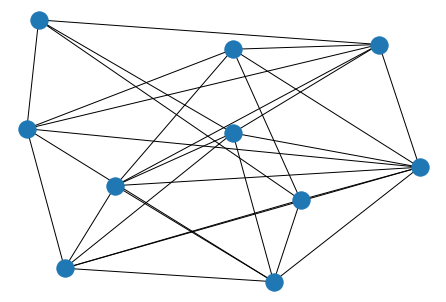

In [20]:
nx.drawing.nx_pylab.draw(np_to_nx(G_sample))

## Homomorphism Densities
Below, you can see a showcase of homomorphism density approximation.

### Between finite graphs $F$ and $G$

In [21]:
from nngraphons.learning.homomorphism_densities import t_discrete

In [22]:
# Approximate homomorphism density with the approximation error being smaller than 0.001 with probability at least 0.95
t_discrete(
    F=C_4,
    G=G_sample,
    epsilon=0.001,
    gamma=0.95
)

0.2894331070677279

### Between a finite graph $F$ and a neural network `net`

In [23]:
from nngraphons.learning.homomorphism_densities import t_nn

In [24]:
# n is the number of times to sample vertices of F in net
t_nn(
    F=C_4,
    net=net,
    n=1000,
    track_computation=False # Do not create a computation DAG for backpropagation
)

tensor(0.0784)

## Creating Finite Graphs $F$ to Calculate Densities With

The package provides the user with some convenience functions to create finite graphs of certain structure.

You can create all finite graphs from size 2 up to $n$ with this function:

In [25]:
from nngraphons.data_manipulation.small_graphs import create_all_graphs

The resulting list of graphs contains only isomorphism-unique ones.

In [26]:
n = 3
create_all_graphs(n)

[(array([0, 1]), array([[0, 1]])),
 (array([0, 1, 2]), array([[1, 2]])),
 (array([0, 1, 2]), array([[0, 2],
         [1, 2]])),
 (array([0, 1, 2]), array([[0, 1],
         [0, 2],
         [1, 2]]))]

You can also create special type graphs:

In [27]:
from nngraphons.data_manipulation.small_graphs import complete_graph, path_graph, cycle_graph, star_graph

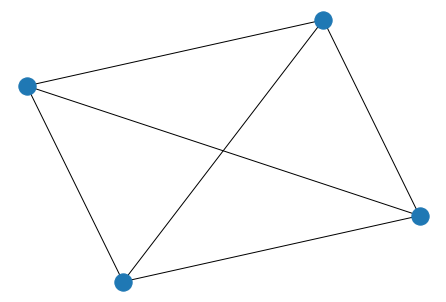

In [28]:
K = complete_graph(4)
nx.drawing.nx_pylab.draw(np_to_nx(K))

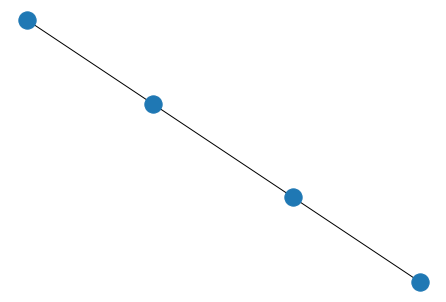

In [29]:
P = path_graph(4)
nx.drawing.nx_pylab.draw(np_to_nx(P))

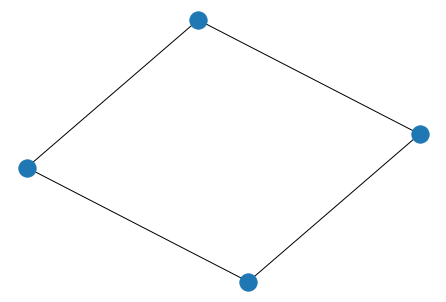

In [30]:
C = cycle_graph(4)
nx.drawing.nx_pylab.draw(np_to_nx(C))

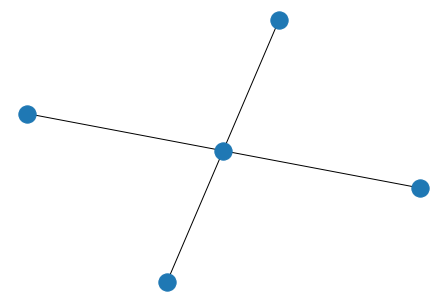

In [31]:
C = star_graph(4)
nx.drawing.nx_pylab.draw(np_to_nx(C))